In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/天池/工业蒸汽

/content/drive/MyDrive/Colab Notebooks/天池/工业蒸汽


## 导入数据分析工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## 数据读取

In [5]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

## 训练数据总览

In [ ]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


## 异常值分析

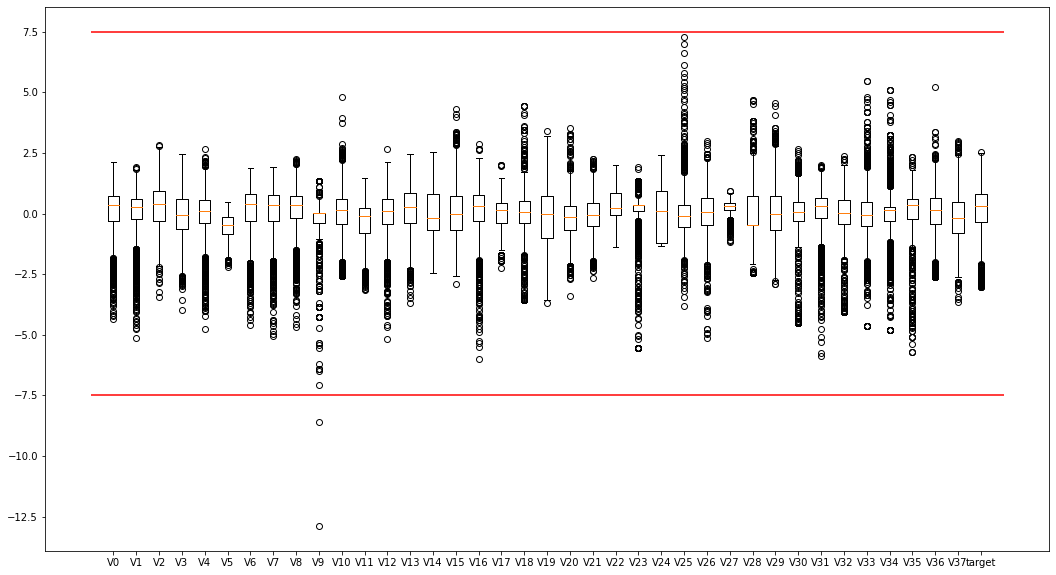

In [ ]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

## 删除异常值

In [ ]:
train_data = train_data[train_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [ ]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


## 最大最小值归一化

In [6]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [ ]:
train_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [ ]:
test_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


## 查看训练集数据和测试集数据分布情况

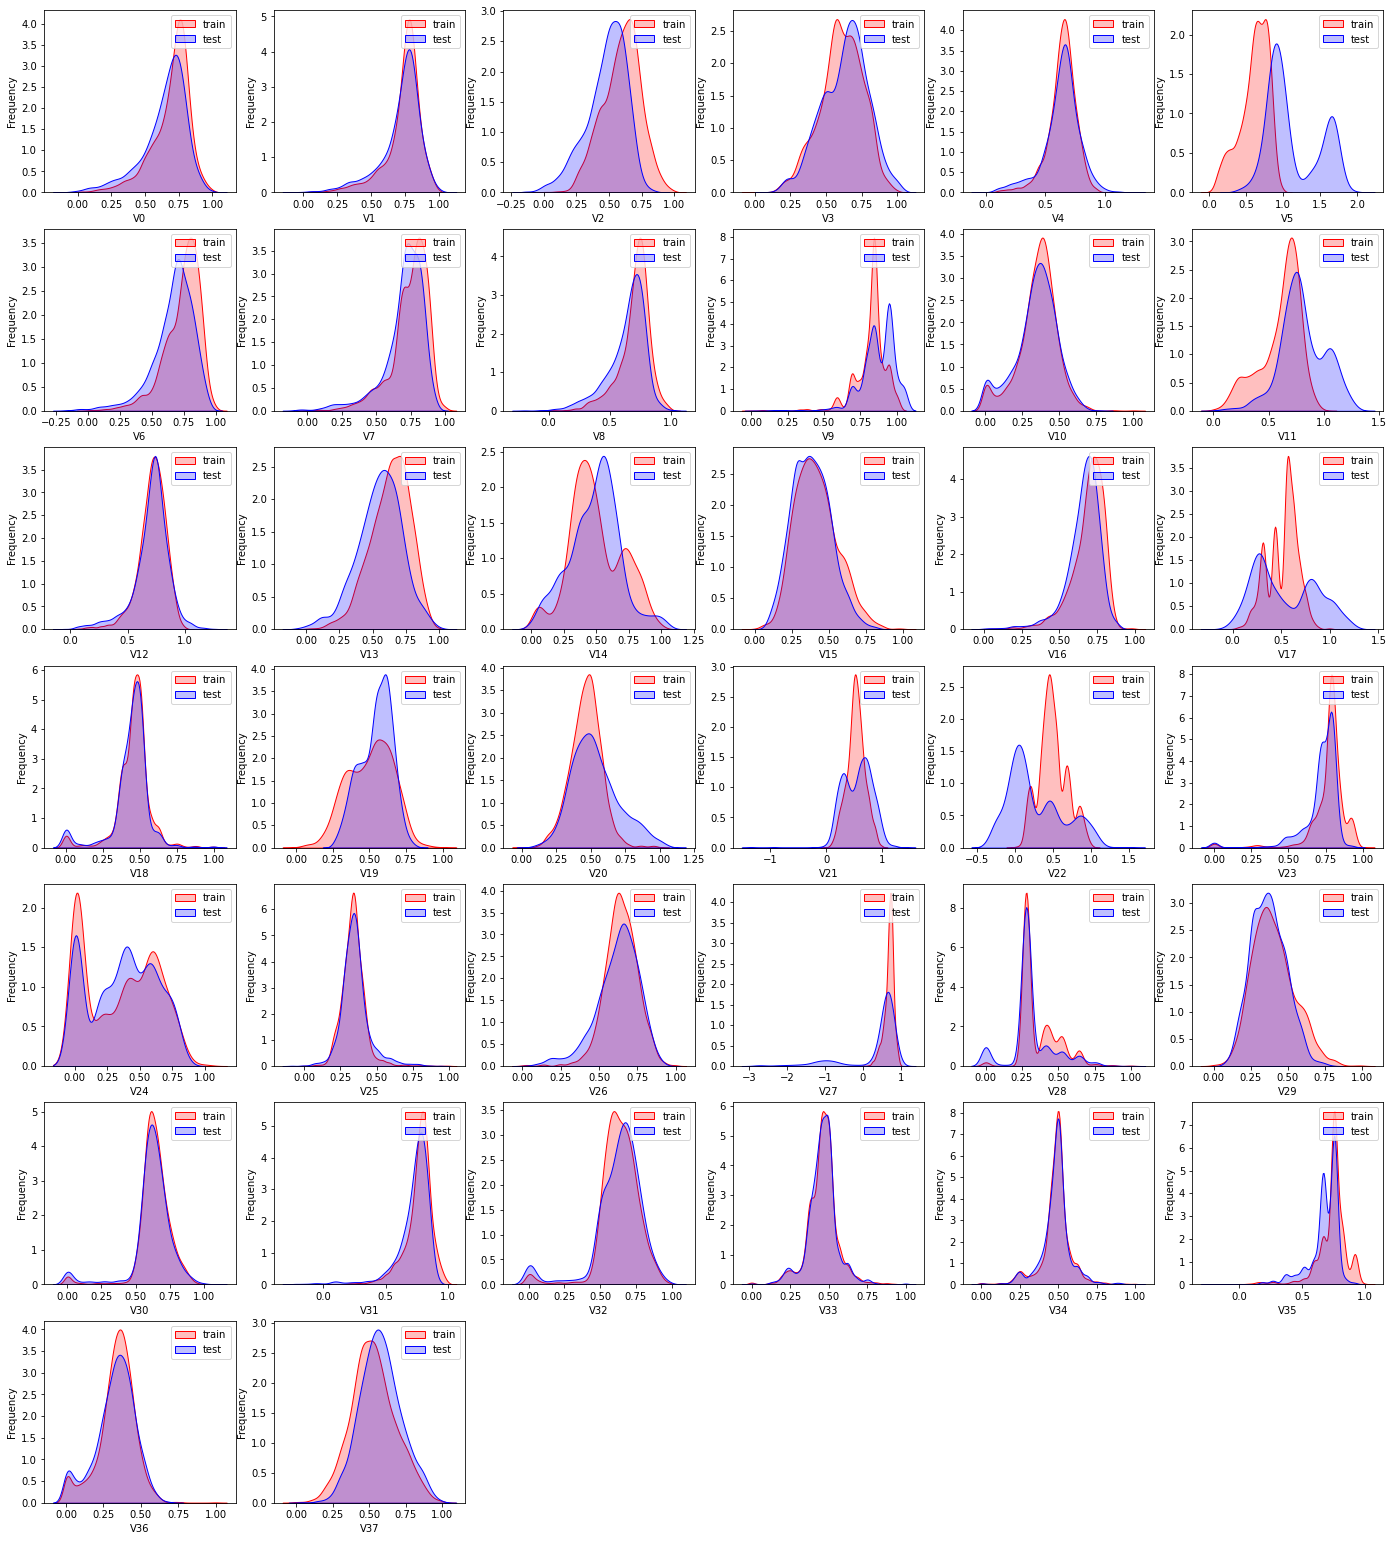

In [ ]:
dist_cols = 6
dist_rows = len(test_data_scaler.columns)

plt.figure(figsize=(4*dist_cols,4*dist_rows))


for i, col in enumerate(test_data_scaler.columns):
    ax=plt.subplot(dist_rows,dist_cols,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
 
plt.show()

查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布

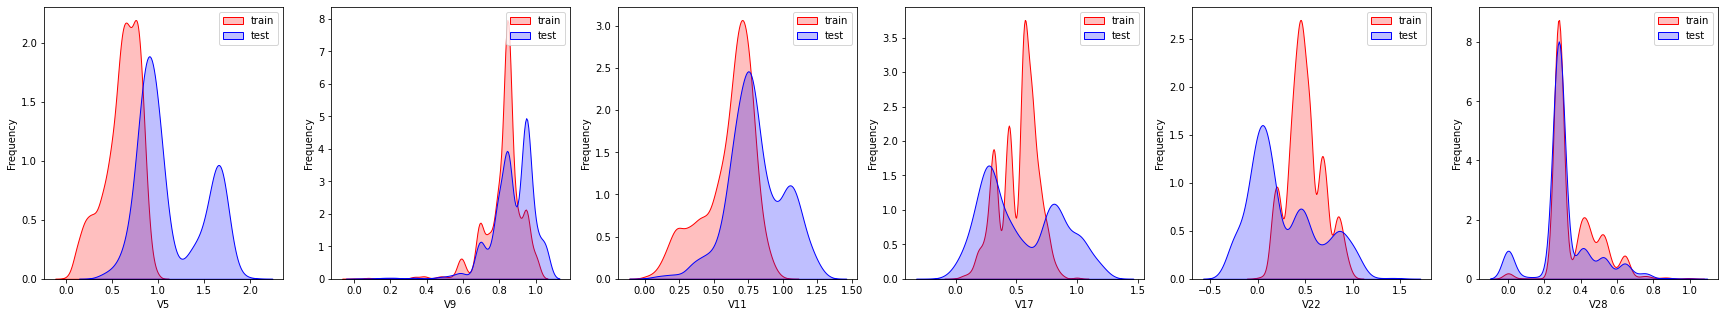

In [ ]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))

for i, col in enumerate(["V5","V9","V11","V17","V22","V28"]):
    ax =plt.subplot(drop_row,drop_col,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax= sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

这几个特征下，训练集的数据和测试集的数据分布不一致，会影响模型的泛化能力，故删除这些特征

## 特征相关性

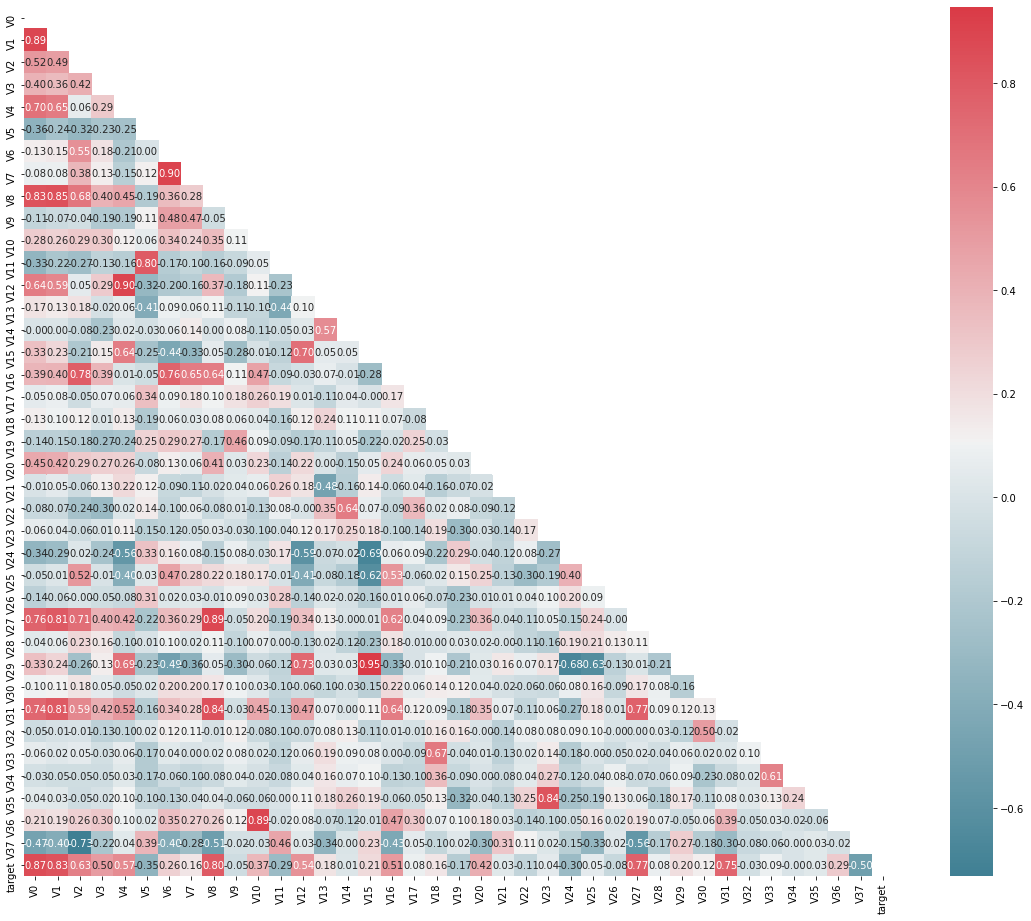

In [7]:
plt.figure(figsize=(20, 16))  
column = train_data_scaler.columns.tolist()  
mcorr = train_data_scaler[column].corr(method="spearman")  
mask = np.zeros_like(mcorr, dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  
plt.show()

# 特征降维

## 相关新分析

In [8]:
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

index0 = numerical_corr.sort_values(ascending=False).index
print(train_data_scaler[index0].corr('spearman'))

target    1.000000
V0        0.866709
V1        0.832457
V8        0.799280
V27       0.765133
V31       0.749034
V2        0.630160
V4        0.574775
V12       0.542429
V16       0.510025
V3        0.501114
V37       0.497162
V20       0.420424
V10       0.371067
V5        0.345683
V24       0.296056
V11       0.293261
V36       0.287696
V6        0.264778
V15       0.213490
V29       0.198244
V13       0.177317
V19       0.171120
V7        0.164981
V18       0.162710
V30       0.123423
V22       0.112248
Name: target, dtype: float64
          target        V0        V1  ...       V18       V30       V22
target  1.000000  0.866709  0.832457  ...  0.162710  0.123423 -0.112248
V0      0.866709  1.000000  0.894256  ...  0.133431  0.100600 -0.077297
V1      0.832457  0.894256  1.000000  ...  0.095113  0.110668 -0.073491
V8      0.799280  0.831926  0.848793  ...  0.080242  0.165773 -0.078464
V27     0.765133  0.763410  0.807414  ...  0.093097  0.168429 -0.111769
V31     0.749034  0.738433

## 相关性初筛

In [9]:
features_corr = numerical_corr.sort_values(ascending=False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr']>0.3] # 筛选出大于相关性大于0.3的特征
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features+['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.866709
2                   V1  0.832457
3                   V8  0.799280
4                  V27  0.765133
5                  V31  0.749034
6                   V2  0.630160
7                   V4  0.574775
8                  V12  0.542429
9                  V16  0.510025
10                  V3  0.501114
11                 V37  0.497162
12                 V20  0.420424
13                 V10  0.371067
14                  V5  0.345683


## 多重共线性分析

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                         'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[215.83914297539948,
 114.4093566013749,
 27.861910576306258,
 200.27677411196444,
 78.84394421458461,
 151.0866809930528,
 14.445272156391962,
 82.61616298400412,
 28.427094437362893,
 27.634753753488145,
 526.8279071854802,
 23.42357510783747,
 19.864392994845318,
 24.628905936780196,
 11.82557721379583,
 4.9535630003602895,
 36.8600840400246,
 298.41002995767514,
 47.93033658697274]

## PCA去除多重共线性 降维

In [11]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保持90%的信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2888.000000
mean,6.833958e-17,-1.678982e-17,-3.479058e-18,-6.539091e-17,8.505431e-17,4.982164e-17,2.057642e-17,-1.039873e-17,-5.029256e-17,-7.227214e-18,-1.364863e-17,5.309888e-18,-3.174880e-17,6.227705e-18,-5.938184e-17,-3.567596e-17,0.126353
std,3.985421e-01,3.490520e-01,2.938955e-01,2.722600e-01,2.035064e-01,1.961281e-01,1.861363e-01,1.607591e-01,1.513411e-01,1.442443e-01,1.345876e-01,1.289251e-01,1.181146e-01,1.148697e-01,1.113406e-01,1.018260e-01,0.983966
min,-1.070204e+00,-9.382404e-01,-1.019585e+00,-6.853347e-01,-7.648509e-01,-5.531376e-01,-5.727510e-01,-5.914083e-01,-6.297522e-01,-4.842131e-01,-5.975088e-01,-5.773973e-01,-4.258712e-01,-4.576412e-01,-3.888960e-01,-3.658579e-01,-3.044000
25%,-2.802786e-01,-2.603790e-01,-2.062572e-01,-1.971748e-01,-1.250776e-01,-1.246339e-01,-1.256336e-01,-1.009689e-01,-9.717828e-02,-9.245411e-02,-8.370005e-02,-7.805577e-02,-7.327538e-02,-7.525674e-02,-7.156570e-02,-6.565231e-02,-0.350250
50%,-1.551054e-02,-8.985867e-03,-1.862128e-02,-2.277698e-02,-4.541365e-03,-1.473143e-02,1.033570e-04,-5.335135e-03,2.214191e-03,-2.135596e-03,5.987825e-03,-5.016301e-03,-7.593646e-03,6.604729e-05,-2.201764e-03,-1.059611e-03,0.313000
75%,2.275077e-01,2.322535e-01,2.133431e-01,1.680986e-01,1.236219e-01,1.020631e-01,1.271116e-01,9.692888e-02,1.005325e-01,9.123200e-02,8.494287e-02,7.162226e-02,6.871951e-02,7.942442e-02,6.896065e-02,6.298074e-02,0.793250
max,1.603357e+00,1.351734e+00,1.021067e+00,1.423139e+00,9.969989e-01,1.301563e+00,6.259154e-01,7.454770e-01,6.420087e-01,5.824542e-01,6.165259e-01,6.543877e-01,5.559756e-01,5.139705e-01,5.040193e-01,4.505913e-01,2.538000


In [12]:
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2888.000000
mean,-9.896453e-17,1.292922e-16,3.719324e-17,-1.653033e-18,6.383398e-17,2.224867e-17,-3.642439e-17,2.577098e-17,7.980689e-17,3.632828e-18,-1.070657e-17,1.658319e-17,-1.322426e-17,2.935575e-17,-3.569158e-17,-4.924140e-17,0.126353
std,3.985421e-01,3.490520e-01,2.938955e-01,2.722600e-01,2.035064e-01,1.961281e-01,1.861363e-01,1.607591e-01,1.513411e-01,1.442443e-01,1.345876e-01,1.289251e-01,1.181146e-01,1.148697e-01,1.113406e-01,1.018260e-01,0.983966
min,-1.070204e+00,-9.382404e-01,-1.019585e+00,-6.853347e-01,-7.648512e-01,-5.531369e-01,-5.727512e-01,-5.914108e-01,-6.297419e-01,-4.842156e-01,-5.975323e-01,-5.773921e-01,-4.259108e-01,-4.576606e-01,-3.889366e-01,-3.659144e-01,-3.044000
25%,-2.802786e-01,-2.603790e-01,-2.062572e-01,-1.971748e-01,-1.250776e-01,-1.246338e-01,-1.256334e-01,-1.009692e-01,-9.717944e-02,-9.245697e-02,-8.369269e-02,-7.806016e-02,-7.327188e-02,-7.526822e-02,-7.156656e-02,-6.572916e-02,-0.350250
50%,-1.551054e-02,-8.985866e-03,-1.862128e-02,-2.277698e-02,-4.540764e-03,-1.473136e-02,1.016620e-04,-5.335352e-03,2.216398e-03,-2.138995e-03,5.994495e-03,-5.024528e-03,-7.590352e-03,7.454785e-05,-2.196219e-03,-1.107668e-03,0.313000
75%,2.275077e-01,2.322535e-01,2.133431e-01,1.680986e-01,1.236219e-01,1.020629e-01,1.271113e-01,9.692839e-02,1.005296e-01,9.123666e-02,8.493554e-02,7.161496e-02,6.871929e-02,7.942132e-02,6.896917e-02,6.291180e-02,0.793250
max,1.603357e+00,1.351734e+00,1.021067e+00,1.423139e+00,9.970004e-01,1.301562e+00,6.259157e-01,7.454772e-01,6.420077e-01,5.824572e-01,6.165094e-01,6.543996e-01,5.560068e-01,5.139949e-01,5.039649e-01,4.507701e-01,2.538000


## 模型训练

### 导入相关库

In [13]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

### 切分训练数据和线下验证数据

In [14]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

### 定义绘制模型学习曲线函数

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

### 多元线性回归模型

In [16]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.14190666867908744


### 绘制线性回归模型学习曲线

[0.87262329 0.86241139 0.86063059 0.85993299 0.85938978]
[0.83812365 0.85058761 0.85274128 0.85345294 0.85390374]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

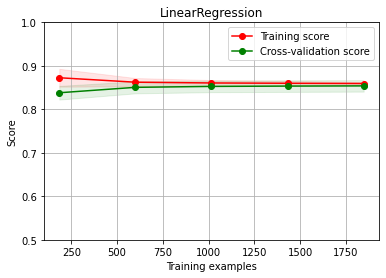

In [21]:
X = train_data.values
y = train_target.values

title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.0), cv=cv, n_jobs=1)

### K近邻回归

In [18]:
clf = KNeighborsRegressor(n_neighbors=8) # 最近三个
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.19629634242538926


### 绘制K近邻回归学习曲线

[0.73353992 0.79640025 0.8173325  0.82870927 0.837523  ]
[0.65420951 0.73129754 0.75498205 0.77164959 0.78353019]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

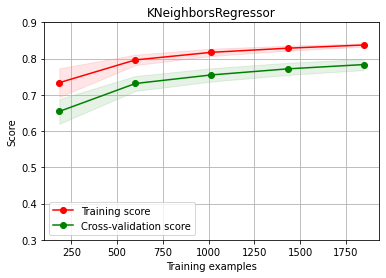

In [19]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 0.9), cv=cv, n_jobs=1)

### 决策树回归

In [24]:
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.30437457785467126


### 绘制决策树学习曲线

[1. 1. 1. 1. 1.]
[0.13656151 0.23976942 0.28816102 0.31202052 0.3313068 ]


<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

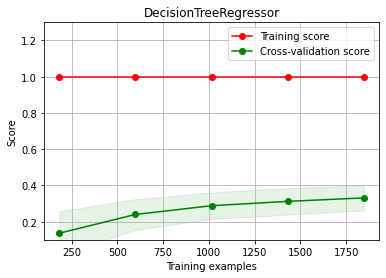

In [ ]:
X = train_data.values
y = train_target.values
 
# 决策树回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=1)

### 随机森林回归

In [25]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.15515077237720587


### 绘制随机森林回归学习曲线

[0.93710161 0.9484381  0.95207278 0.95429421 0.95577322]
[0.54751474 0.61913279 0.64592986 0.66087457 0.67391825]


<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

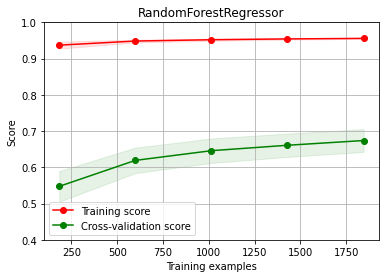

In [ ]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=200)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)

### lgb模型回归

In [26]:
# lgb回归模型
clf = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )

# 训练模型
clf.fit(X=train_data, y=train_target, eval_metric='MSE',verbose=50)

score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGbm:   ", score)

lightGbm:    0.14185188369406299


### 绘制lgb回归学习曲线

[0.5527596  0.63963509 0.6510851  0.64418674 0.63427812]
[0.42259615 0.50257567 0.52627317 0.53338081 0.53649796]


<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

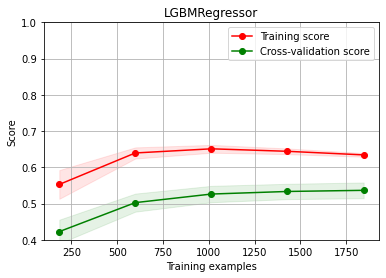

In [ ]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"LGBMRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = lgb.LGBMRegressor(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=100,
    boosting_type='gbdt',
    random_state=2019,
    objective='regression'
    )    #建模

plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)